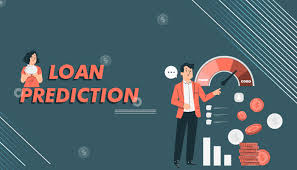

# 1.Importing The Requeried Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 2.Loading the csv file

In [2]:
df=pd.read_csv("train_ctrUa4K.csv")

# 3.Applying the basic data analysis operations

In [3]:
df.shape


(614, 13)

In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# 4.Checking the null values

In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# 4.1 Gender column counts

In [10]:
df.Gender.value_counts(dropna=False)

Gender
Male      489
Female    112
NaN        13
Name: count, dtype: int64

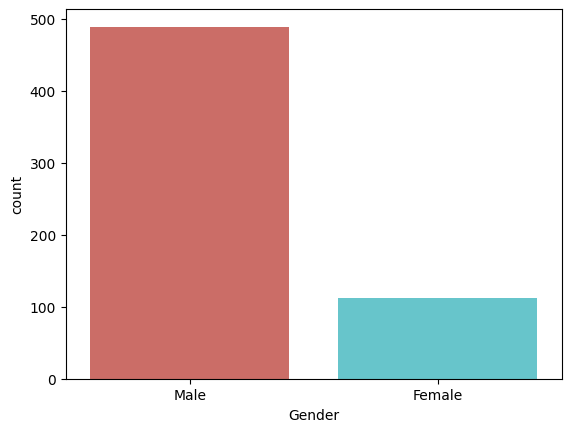

In [11]:
sns.countplot(x="Gender",data=df,palette="hls")
plt.show()

# 4.2 Checking the percentage of male and female in Gender columns

In [12]:
countmale=len(df[df.Gender=="Male"])
countfemale=len(df[df.Gender=="Female"])
countnull=len(df[df.Gender.isnull()])
print("Percentage of male applicant:{:.2f}%".format((countmale/(len(df.Gender))*100)))
print("percentage of female applicant:{:.2f}%".format((countfemale/(len(df.Gender))*100)))
print("missing values percentage:{:.2f}%".format((countnull/(len(df.Gender))*100)))


Percentage of male applicant:79.64%
percentage of female applicant:18.24%
missing values percentage:2.12%


# 4.3. Married column count

In [13]:
df.Married.value_counts(dropna=False)

Married
Yes    398
No     213
NaN      3
Name: count, dtype: int64

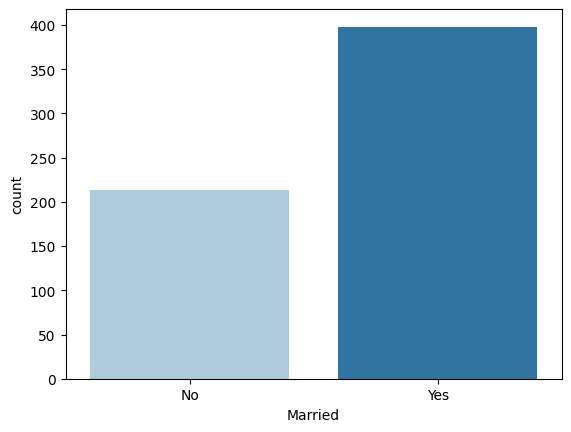

In [14]:
sns.countplot(x="Married",data=df,palette='Paired')
plt.show()

--->To see the above plot most of the peoples are married some of them are unmarried and some of the missing values also there 

# 4.3.1. Checking the Married column percentage 

In [15]:
countMarried=len(df[df.Married=="Yes"])
countUnMarried=len(df[df.Married=="No"])
countnull=len(df[df.Married.isnull()])
print("Percentage of the Married :{:.2f}%".format((countMarried/(len(df.Married))*100)))
print("Percentage of the UnMarried:{:.2f}%".format((countUnMarried/(len(df.Married))*100)))
print("Percentage of the null values:{:.2f}%".format((countnull/(len(df.Married))*100)))


Percentage of the Married :64.82%
Percentage of the UnMarried:34.69%
Percentage of the null values:0.49%


# 4.4.Education value counts 

In [16]:
df.Education.value_counts(dropna=False)


Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

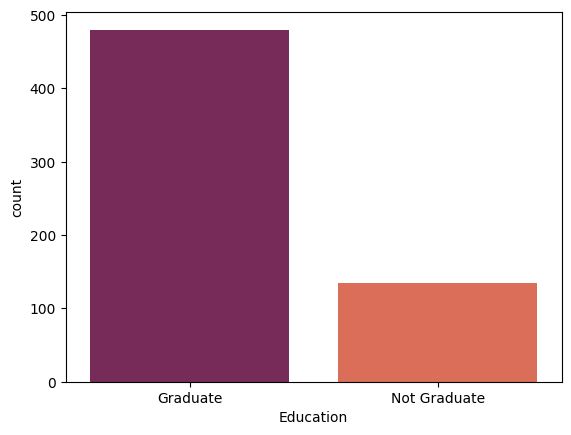

In [17]:
sns.countplot(x="Education",data=df,palette="rocket")

# 4.4.1 Education columns checking percentage

In [18]:
countGraduation=len(df[df.Education=="Graduate"])
countNotGraduation=len(df[df.Education=="Not Graduate"])
countnull=len(df[df.Education.isnull()])
print("Percentage of the Graduation:{:.2f}%".format((countGraduation/(len(df.Education))*100)))
print("Percentage of the Not Graduation:{:.2f}%".format((countNotGraduation/(len(df.Education))*100)))
print("Percentage of the null values:{:.2f}%".format((countnull/(len(df.Education))*100)))


Percentage of the Graduation:78.18%
Percentage of the Not Graduation:21.82%
Percentage of the null values:0.00%


-->Like that if want any perticular column percentage and its value count like that we solving the problem

-->For this we can perform value count on each and every column

# 4.we are iterating each and every column value_counts

In [19]:
# The below code some of the column we are exclude way means it is not important for the results so we skip this columns and remaining columns important
exclude_cols=['Education','Loan_ID','ApplicantIncome','CoapplicantIncome','CoapplicantIncome','LoanAmount']
for col in df.columns:
    if col not in exclude_cols:
        print(df[col].value_counts())


Gender
Male      489
Female    112
Name: count, dtype: int64
Married
Yes    398
No     213
Name: count, dtype: int64
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
Self_Employed
No     500
Yes     82
Name: count, dtype: int64
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64
Credit_History
1.0    475
0.0     89
Name: count, dtype: int64
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
Loan_Status
Y    422
N    192
Name: count, dtype: int64


# countplot for the above labels

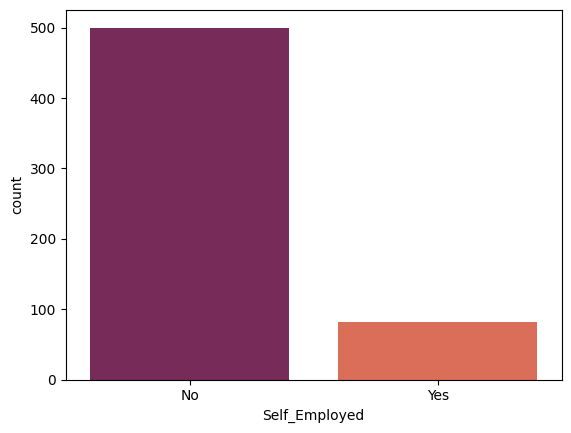

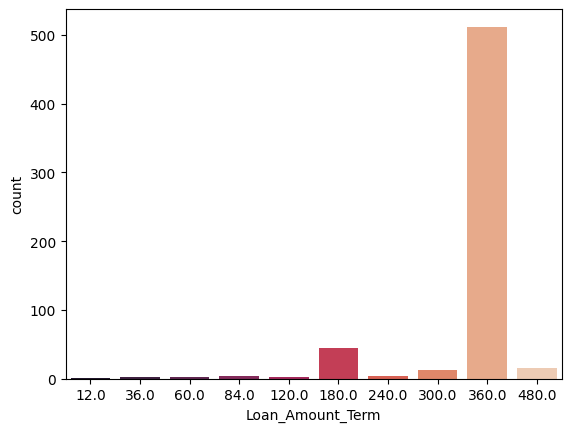

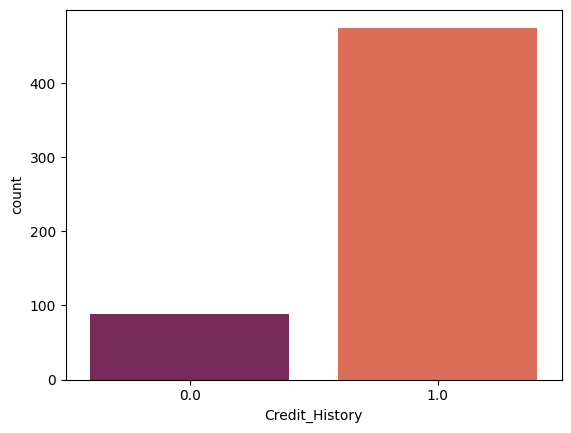

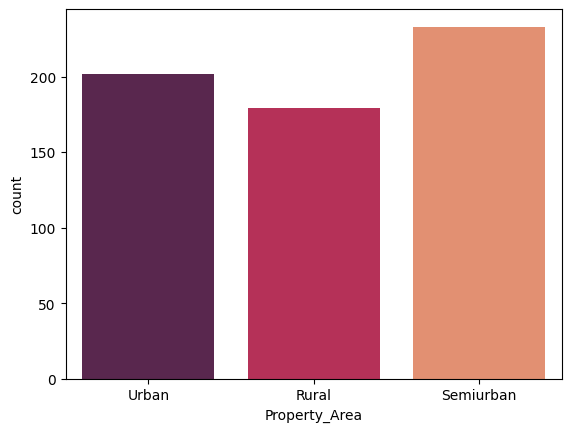

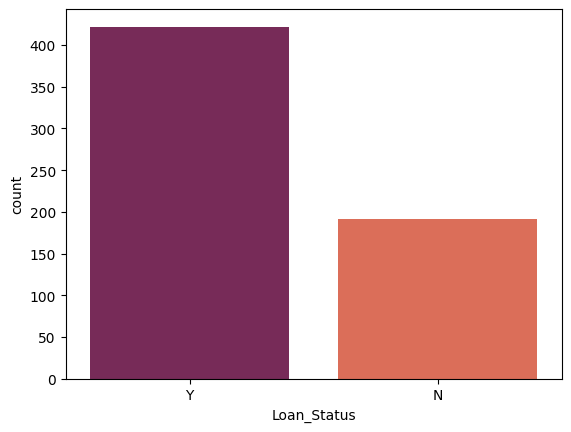

In [20]:
labels=['Self_Employed','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']
for col in labels:
    sns.countplot(x=col,data=df,palette="rocket")
    plt.show()
    

# 5.Filling null values with mode()

In [21]:
# checking the null value percentage on each column
null_per=df.isnull().mean()*100
print(null_per)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64


In [22]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [24]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [25]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [26]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# 5.1Droping the unnessary Variables


In [27]:
df=df.drop(['Loan_ID'],axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [28]:
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [29]:
df['Dependents'].replace("3+",'3',inplace=True)
df['Dependents'].unique()

array(['0', '1', '2', '3'], dtype=object)

In [30]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# 5.2.Checking the outliers and remove 

In [31]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Calculate quantiles for numerical columns
Q1 = numerical_columns.quantile(0.25)
Q3 = numerical_columns.quantile(0.75)
IQR = Q3 - Q1

# Print the results
print("Q1 (25th percentile):\n", Q1)
print("\nQ3 (75th percentile):\n", Q3)
print("\nInterquartile Range (IQR):\n", IQR)


Q1 (25th percentile):
 ApplicantIncome      2877.50
CoapplicantIncome       0.00
LoanAmount            100.25
Loan_Amount_Term      360.00
Credit_History          1.00
Name: 0.25, dtype: float64

Q3 (75th percentile):
 ApplicantIncome      5795.00
CoapplicantIncome    2297.25
LoanAmount            164.75
Loan_Amount_Term      360.00
Credit_History          1.00
Name: 0.75, dtype: float64

Interquartile Range (IQR):
 ApplicantIncome      2917.50
CoapplicantIncome    2297.25
LoanAmount             64.50
Loan_Amount_Term        0.00
Credit_History          0.00
dtype: float64


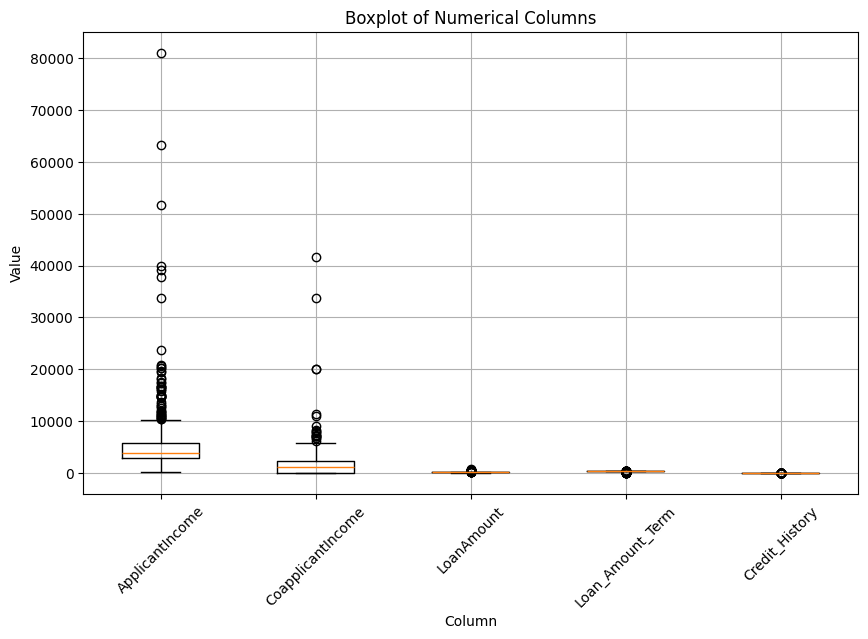

In [32]:
#checking the outliers
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Create boxplot for each numerical column
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.boxplot(numerical_columns.values, labels=numerical_columns.columns)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Boxplot of Numerical Columns')
plt.xlabel('Column')
plt.ylabel('Value')
plt.grid(True)
plt.show()


In [33]:
df = pd.get_dummies(df)

# Drop columns
df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)

# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}
       
df.rename(columns=new, inplace=True)

In [34]:
# Align indices of DataFrame and quartiles
df, Q1 = df.align(Q1, axis=1)
df, Q3 = df.align(Q3, axis=1)
df, IQR = df.align(IQR, axis=1)

# Filter the DataFrame based on outliers using the computed quartiles
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Display the filtered DataFrame
print(df)


     ApplicantIncome  CoapplicantIncome  Credit_History  Dependents_0  \
0               5849                0.0             1.0          True   
1               4583             1508.0             1.0         False   
2               3000                0.0             1.0          True   
3               2583             2358.0             1.0          True   
4               6000                0.0             1.0          True   
..               ...                ...             ...           ...   
607             3987             1411.0             1.0         False   
608             3232             1950.0             1.0          True   
609             2900                0.0             1.0          True   
611             8072              240.0             1.0         False   
612             7583                0.0             1.0         False   

     Dependents_1  Dependents_2  Dependents_3  Education  Gender  LoanAmount  \
0           False         False         Fal

In [35]:
# Square Root Transformation

df.ApplicantIncome = np.sqrt(df.ApplicantIncome)
df.CoapplicantIncome = np.sqrt(df.CoapplicantIncome)
df.LoanAmount = np.sqrt(df.LoanAmount)

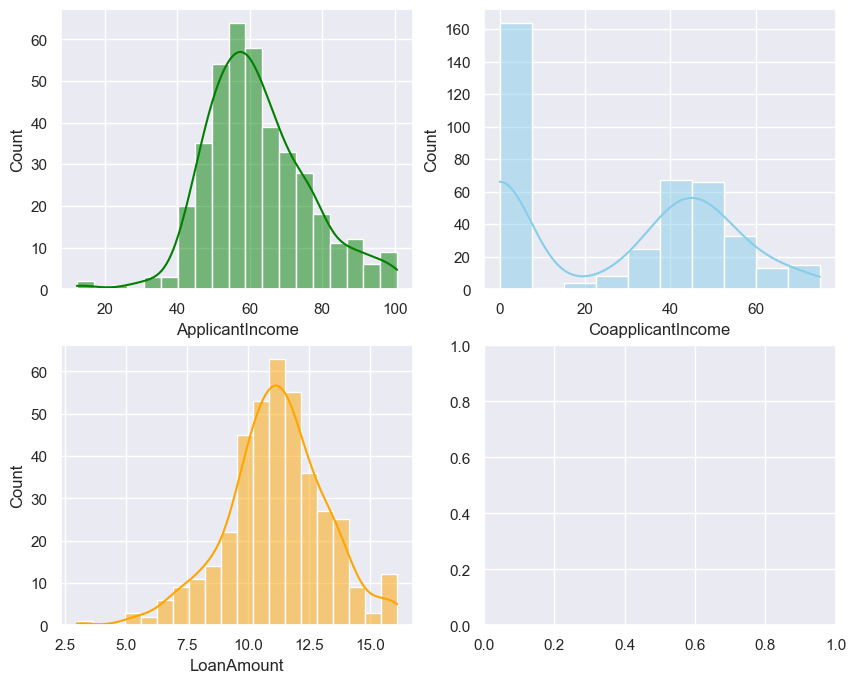

In [36]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');


In [37]:
X = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]

In [38]:
from imblearn.over_sampling import SMOTE
X, y = SMOTE().fit_resample(X, y)

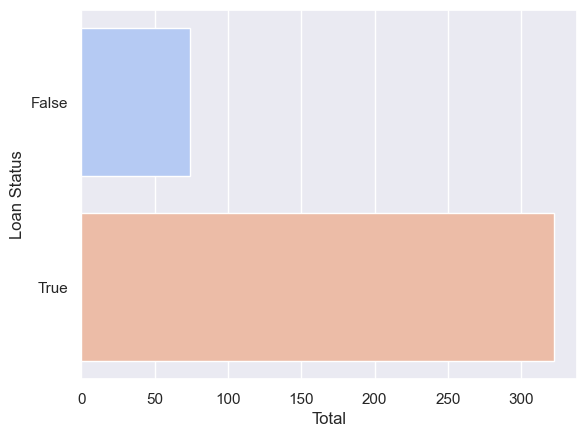

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
sns.countplot(y='Loan_Status', data=df, palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()


# Using min max scaler for tranforming the data

In [40]:
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Logistic regression

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

       False       0.93      0.60      0.73        67
        True       0.69      0.95      0.80        62

    accuracy                           0.77       129
   macro avg       0.81      0.77      0.76       129
weighted avg       0.81      0.77      0.76       129

[[40 27]
 [ 3 59]]
LR accuracy: 76.74%


# K N N

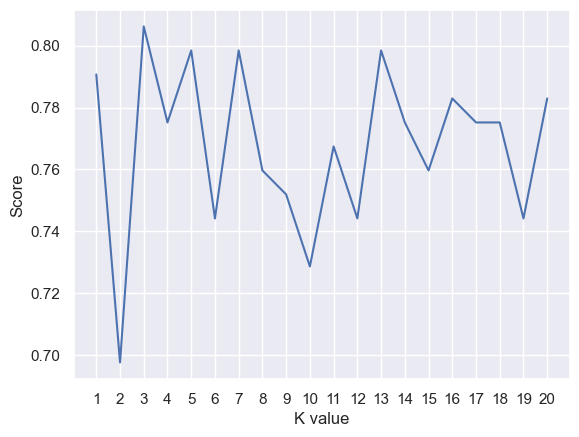

KNN best accuracy: 80.62%


In [43]:
from sklearn.neighbors import KNeighborsClassifier
scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))
    
plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

# S V M

In [44]:
from sklearn.svm import SVC
SVCclassifier = SVC(kernel='rbf', max_iter=500)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

       False       0.98      0.60      0.74        67
        True       0.69      0.98      0.81        62

    accuracy                           0.78       129
   macro avg       0.83      0.79      0.78       129
weighted avg       0.84      0.78      0.78       129

[[40 27]
 [ 1 61]]
SVC accuracy: 78.29%


# Decision Tree

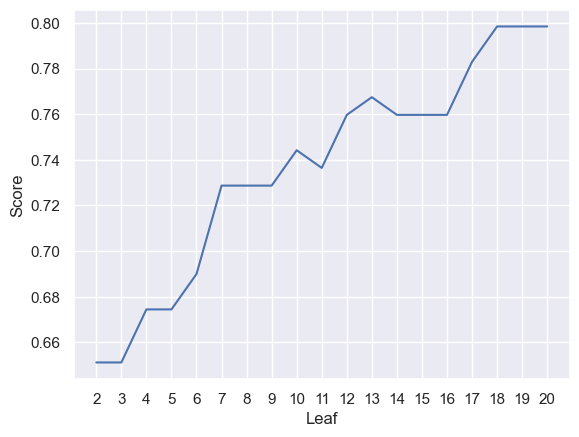

Decision Tree Accuracy:79.84%


In [45]:
from sklearn.tree import DecisionTreeClassifier
scoreListDT=[]
for i in range(2,21):
    DTclassifier=DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train,y_train)
    scoreListDT.append(DTclassifier.score(X_test,y_test))
plt.plot(range(2,21),scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc=max(scoreListDT)
print("Decision Tree Accuracy:{:.2f}%".format(DTAcc*100))

# Gradient Boost

In [46]:
paramsGB={'n_estimators':[100,200,300,400,500],
      'max_depth':[1,2,3,4,5],
      'subsample':[0.5,1],
      'max_leaf_nodes':[2,5,10,20,30,40,50]}

In [48]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
GB = RandomizedSearchCV(GradientBoostingClassifier(), paramsGB, cv=20)
GB.fit(X_train, y_train)

RandomizedSearchCV(cv=20, estimator=GradientBoostingClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'max_leaf_nodes': [2, 5, 10, 20, 30, 40,
                                                           50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 1]})

In [49]:
print(GB.best_estimator_)
print(GB.best_score_)
print(GB.best_params_)
print(GB.best_index_)

GradientBoostingClassifier(max_depth=4, max_leaf_nodes=20, n_estimators=200,
                           subsample=1)
0.8267692307692307
{'subsample': 1, 'n_estimators': 200, 'max_leaf_nodes': 20, 'max_depth': 4}
8


In [51]:
GBclassifier = GradientBoostingClassifier(subsample=0.5, n_estimators=400, max_depth=4, max_leaf_nodes=10)
GBclassifier.fit(X_train, y_train)

y_pred = GBclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
GBAcc = accuracy_score(y_pred,y_test)
print('Gradient Boosting accuracy: {:.2f}%'.format(GBAcc*100))

              precision    recall  f1-score   support

       False       0.86      0.82      0.84        67
        True       0.82      0.85      0.83        62

    accuracy                           0.84       129
   macro avg       0.84      0.84      0.84       129
weighted avg       0.84      0.84      0.84       129

[[55 12]
 [ 9 53]]
Gradient Boosting accuracy: 83.72%


In [58]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 
                                  'SVM','Decision Tree','Gradient Boost'], 
                        'Accuracy': [LRAcc*100, KNAcc*100, SVCAcc*100,DTAcc*100,GBAcc*100]})
compare.sort_values(by="Accuracy", ascending=False)


,Model,Accuracy
4,Gradient Boost,83.720930
1,K Neighbors,80.620155
3,Decision Tree,79.844961
2,SVM,78.294574
0,Logistic Regression,76.744186
